In [1]:
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u
from astropy.io import ascii

# RedMAPPER

In [16]:
data = fits.open("Data/redmapper_dr8_public_v6.3_catalog.fits.gz")[1].data

In [19]:
data.columns

ColDefs(
    name = 'ID'; format = 'J'
    name = 'NAME'; format = '20A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'Z_LAMBDA'; format = 'E'
    name = 'Z_LAMBDA_ERR'; format = 'E'
    name = 'LAMBDA'; format = 'E'
    name = 'LAMBDA_ERR'; format = 'E'
    name = 'S'; format = 'E'
    name = 'Z_SPEC'; format = 'E'
    name = 'OBJID'; format = 'K'
    name = 'IMAG'; format = 'E'
    name = 'IMAG_ERR'; format = 'E'
    name = 'MODEL_MAG_U'; format = 'E'
    name = 'MODEL_MAGERR_U'; format = 'E'
    name = 'MODEL_MAG_G'; format = 'E'
    name = 'MODEL_MAGERR_G'; format = 'E'
    name = 'MODEL_MAG_R'; format = 'E'
    name = 'MODEL_MAGERR_R'; format = 'E'
    name = 'MODEL_MAG_I'; format = 'E'
    name = 'MODEL_MAGERR_I'; format = 'E'
    name = 'MODEL_MAG_Z'; format = 'E'
    name = 'MODEL_MAGERR_Z'; format = 'E'
    name = 'ILUM'; format = 'E'
    name = 'P_CEN'; format = '5E'
    name = 'RA_CEN'; format = '5E'
    name = 'DEC_CEN'; format = '5E'
    name = '

In [23]:
np.median(data.Z_LAMBDA_ERR)

0.014425505

# Zou

In [37]:
data = ascii.read("Data/clusters.dat")

In [38]:
data

<Table length=540432>
   col1        col2         col3       col4   ...  col35   col36   col37 
  int64      float64      float64    float64  ... float64 float64 float64
---------- ------------ ------------ -------- ... ------- ------- -------
   9500010 146.48986299  84.30426348 0.204689 ... 11.2389 11.2633 11.3335
   9600004 156.95931626  84.61611586 0.523646 ... 12.0613 12.0152 12.0838
   9600017  158.2086938  84.65725642 0.255637 ...  11.588 11.5565 11.6303
   9600020 159.22720045  84.29672275 0.338737 ... 11.0039 10.9558 11.0591
   9600030 160.32860126  84.43073742 0.694048 ... 10.5442 10.5127 10.7084
   9700004 169.30509819  84.70358122 0.779641 ... 11.3506 11.3045 11.3927
   9700015 168.35887381  84.54733113 0.227482 ... 10.4998 10.4572 10.5327
   9700018 169.04297971  84.59168636  0.27188 ...  11.474 11.4229  11.499
   9700024 170.14222569  84.43886031 0.656942 ... 11.1835 11.0028 11.2013
   9900005 195.74797069  84.72643686 0.170528 ... 11.3952 11.3654 11.4338
       ...          ...          ...      ... ...     ...     ...     ...
4558500063  96.73886404 -59.34510552  0.50672 ... 11.0539 11.0385 11.2299
4558500088   97.0954075 -59.17875658 0.652741 ...  11.705 11.6105 11.7273
4558500091  96.96900865 -59.12870298 0.507586 ... 11.1695 11.1179 11.2521
4558500095  97.75680516 -58.58054974 0.227832 ... 11.3261 11.2526 11.3287
4558500096  97.89989024 -58.55000849 0.267931 ... 11.1058 11.0659  11.134
4558500097  98.04293906 -58.50219689 0.337917 ... 11.7788 11.7577 11.8308
4558500106  97.77369164 -59.06769425 0.485729 ... 10.2589 10.2564 10.3604
4558500111  97.75960663 -58.94279947 0.628747 ... 11.2277 11.1897   11.29
4558500131  97.05527783 -58.78004001 0.483833 ...  11.466 11.4109 11.4882
4558500155  97.30686183 -58.99075602 0.767353 ... 9.75528 9.59311 9.77319

In [39]:
columns = ["ID",
    "RA",
    "DEC",
    "zphot",
    "zspec",
    "den",
    "Bkg",
    "RAMdeg",
    "DEMdeg",
    "Ng",
    "Ltot",
    "M500",
    "R500",
    "Richness",
    "RABdeg",
    "DEBdeg",
    "zphotB",
    "e_zphotB",
    "zspecB",
    "gmag",
    "rmag",
    "zmag",
    "W1mag",
    "W2mag",
    "e_gmag",
    "e_rmag",
    "e_zmag",
    "e_W1mag",
    "e_W2mag",
    "gMag",
    "rMag",
    "zMag",
    "W1Mag",
    "W2Mag",
    "Mass",
    "b_Mass",
    "B_Mass"]

In [40]:
zou = data.to_pandas()

In [41]:
zou.columns = columns

In [42]:
np.median(np.abs(zou.zphot - zou.zspec))

10.518543999999999

(0.0, 0.1)

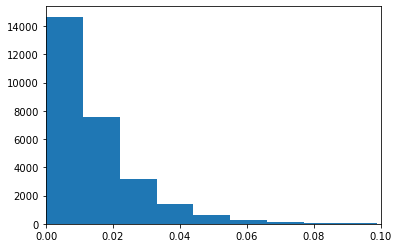

In [45]:
plt.hist(np.abs(zou.zphot - zou.zspec), bins =1000)
plt.xlim(0, 0.1)

In [7]:
zou[["RA", "DEC"]].head(50)

RA        DEC
0   146.489863  84.304263
1   156.959316  84.616116
2   158.208694  84.657256
3   159.227200  84.296723
4   160.328601  84.430737
5   169.305098  84.703581
6   168.358874  84.547331
7   169.042980  84.591686
8   170.142226  84.438860
9   195.747971  84.726437
10  201.312278  84.375854
11  202.025256  84.349459
12  202.245167  84.353481
13  203.268253  84.710802
14  209.688092  84.575925
15  213.083941  84.377945
16  129.174755  83.955457
17  129.252721  84.111906
18  128.388985  83.654281
19  128.923310  83.727065
20  128.824004  84.219217
21  137.644149  84.222626
22  138.016246  84.237433
23  138.243256  84.384335
24  138.290403  84.085509
25  139.186418  83.727459
26  139.499191  83.747231
27  138.833975  83.764712
28  138.985969  83.840319
29  138.099601  83.864488
30  139.556821  84.225413
31  140.558382  83.602929
32  140.442238  83.762279
33  145.465912  84.161994
34  144.633816  84.194618
35  144.413814  84.055966
36  140.886339  84.379122
37  140.489109  84.442483
38  143.075252  83.804918
39  143.076487  83.829373
40  140.804516  84.162117
41  149.910554  84.124625
42  148.466031  83.884274
43  147.889650  84.177198
44  149.399180  84.184663
45  149.142119  84.304665
46  149.580697  83.528903
47  150.386376  83.666731
48  150.599823  84.035806
49  150.449708  84.121618

In [25]:
#clumpr = Table.read("DESI_clusters.fits").to_pandas()
clumper = Table.read("DESI_clusters_2023.fits").to_pandas()

In [27]:
clumper.columns

Index(['RA_central', 'DEC_central', 'z_median_central', 'z_average_no_wt',
       'z_average_prob', 'z_average_mass_prob', 'z_std_central', 'z_std_no_wt',
       'z_std_prob', 'z_std_mass_prob', 'RELEASE', 'BRICKID', 'OBJID',
       'MASKBITS', 'gid', 'mass_central', 'cluster_mass_onempc',
       'cluster_mass_halfmpc', 'cluster_mass_tenthmpc', 'richness_onempc',
       'richness_halfmpc', 'richness_tenthmpc'],
      dtype='object')

In [29]:
np.median(clumper.z_std_no_wt)

0.10536826017521664

In [30]:
np.median(clumper.z_std_prob)

0.06935493245123975

In [31]:
np.median(clumper.z_std_mass_prob)

0.06880125900220932

In [9]:
clumper[np.logical_and.reduce((clumper.RA_central < 197.9, clumper.RA_central > 197.8, clumper.DEC_central < -1.3, clumper.DEC_central > -1.37))]

index  RA_central  DEC_central  z_median_central  z_average_no_wt  \
231061  120199   197.87297    -1.341088          0.177919         0.226558   

        z_average_prob  z_average_mass_prob  z_std_central  z_std_no_wt  \
231061        0.196198             0.196234       0.016937      0.09694   

        z_std_prob  ...  neighbor_mass  local_neighbor_mass  \
231061    0.044258  ...      13.368989         1.581682e+13   

        ultra_local_neighbor_mass  correction_factor   neighbors  \
231061               6.787983e+12           1.460799  282.133333   

        local_neighbors  ultra_local_neighbors  flag_foreground  \
231061            137.9                   16.7                0   

        flag_duplicate  edge_mask  
231061               0          1  

[1 rows x 27 columns]

In [10]:
print(int(clumper[np.logical_and.reduce((clumper.RA_central < 197.9, clumper.RA_central > 197.8, clumper.DEC_central < -1.3, clumper.DEC_central > -1.37))].gid))

1978729700088658944


In [11]:
len(clumper[np.logical_and.reduce((clumper.neighbor_mass > 13.368989, clumper.z_median_central > 0.1, clumper.flag_foreground == 0))])

80

In [12]:
clumper[np.logical_and.reduce((clumper.neighbor_mass > 13.368989, clumper.z_median_central > 0.1, clumper.flag_foreground == 0))][["RA_central", "DEC_central", "neighbor_mass"]].tail(20)

RA_central  DEC_central  neighbor_mass
310998  343.147767     4.523542      13.495792
314987  350.561514    28.520936      13.386124
314988  350.246408    29.216867      13.431582
319389   12.295633   -24.678640      13.407261
319390   10.854721   -20.616964      13.374556
322616  322.097574     1.593476      13.401717
327794  150.886035    -2.949278      13.372674
332119  346.723184   -65.088206      13.373558
332159   24.354089    -8.456368      13.402716
334170   18.159329   -33.110641      13.374155
341668   34.637069   -31.552088      13.422567
344201  262.916375    22.866265      13.611883
351158  164.249961    -3.626715      13.405206
357162  149.174232    -2.416392      13.369874
364126  125.015554    23.417334      13.380832
370643  263.100388    19.554622      13.412184
381134   44.421151   -22.154941      13.431721
385620   47.198058    -9.714837      13.407002
387507  333.407609    -8.424340      13.432849
391524    3.674222    26.671799      13.373745

In [13]:
10**13.611883 / 10**13.368989

1.749419648626041

In [14]:
clumper[np.logical_and.reduce((clumper.z_median_central > 0.1, clumper.flag_duplicate == 0, np.logical_or(clumper.flag_foreground == 0, clumper.flag_foreground == 1)))].sort_values(by = "neighbor_mass", ascending = False)[["RA_central", "DEC_central"]].head(50)

RA_central  DEC_central
344201  262.916375    22.866265
181319   23.433695    30.542981
91602   109.398539    37.754779
26179   269.219300    40.135312
181336   23.416288    30.533698
181320   23.329569    30.611762
181329   23.432779    30.741407
310998  343.147767     4.523542
4545    132.744410    48.500644
237821   30.070957    27.805921
220291  351.865118    -2.077098
261835   39.969665    -1.571922
98928   213.696609    54.784308
100959  137.712674    38.839539
96739   215.168253    39.919530
20913   139.472562    51.727031
1571    207.902007    52.104681
31788   257.397317    47.531214
179665    3.586243   -30.400146
5305    184.800888    50.909656
387507  333.407609    -8.424340
180546  332.941336    -3.829000
381134   44.421151   -22.154941
106726  175.603264    58.534797
314988  350.246408    29.216867
218346  344.657819   -13.886452
116308   48.753697   -27.302932
62579   121.146211    33.085673
196782   76.186384   -27.992520
118182  177.398679    22.398470
10962   231.638397    54.152032
341668   34.637069   -31.552088
214502  221.089200     9.447583
181325   23.413912    30.521966
186004  324.503521   -60.131666
249443  327.588904    -8.788423
259821   48.218195     1.878807
131311  126.511816     4.324955
370643  263.100388    19.554622
111669    9.225326   -12.109467
206675   71.698793   -37.063019
283608  347.092614    -2.192169
144978    8.039177    18.115538
319389   12.295633   -24.678640
385620   47.198058    -9.714837
351158  164.249961    -3.626715
332159   24.354089    -8.456368
322616  322.097574     1.593476
18685   270.277202    39.868552
144979    4.639935    16.437758

In [15]:
clumper.columns

Index(['index', 'RA_central', 'DEC_central', 'z_median_central',
       'z_average_no_wt', 'z_average_prob', 'z_average_mass_prob',
       'z_std_central', 'z_std_no_wt', 'z_std_prob', 'z_std_mass_prob',
       'RELEASE', 'BRICKID', 'OBJID', 'MASKBITS', 'gid', 'mass_central',
       'neighbor_mass', 'local_neighbor_mass', 'ultra_local_neighbor_mass',
       'correction_factor', 'neighbors', 'local_neighbors',
       'ultra_local_neighbors', 'flag_foreground', 'flag_duplicate',
       'edge_mask'],
      dtype='object')

In [16]:
clumpr = clumper[np.logical_and(clumper.flag_duplicate == 0, np.logical_or(clumper.flag_foreground == 0, clumper.flag_foreground == 1))].copy()

In [17]:
#Corrected richness approx
from scipy.interpolate import interp1d
richness_north = pd.read_csv("north_background.csv")
richness_south = pd.read_csv("south_background.csv")
background_north = interp1d(richness_north.z, richness_north["1mpcbkgd"], kind = "linear", fill_value = "extrapolate")
background_south = interp1d(richness_south.z, richness_south["1mpcbkgd"], kind = "linear", fill_value = "extrapolate")

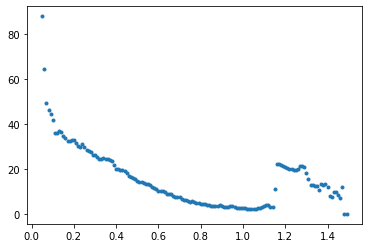

In [18]:
plt.plot(richness_north.z, background_north(richness_north.z), ".")

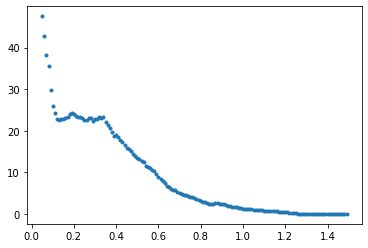

In [19]:
plt.plot(richness_south.z, background_south(richness_south.z), ".")

In [20]:
clumpr["corrected_richness"] = clumpr.neighbors - background_north(clumpr.z_median_central)

In [21]:
clumpr.corrected_richness.mean()

22.798256385317295

In [22]:
clumpr.loc[clumpr.DEC_central > 32, "corrected_richness"] = clumpr.neighbors - background_south(clumpr.z_median_central)

In [23]:
clumpr.corrected_richness.mean()

23.64931203851463

In [24]:
clumpr.z_std_no_wt.mean()

0.12226641014863047

In [25]:
clumpr.z_std_prob.mean()

0.07622690265460394

In [26]:
clumpr.z_std_mass_prob.mean()

0.07529518519539079

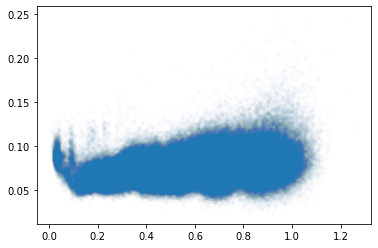

In [27]:
plt.plot(clumpr.z_median_central, clumpr.z_std_mass_prob, ".", alpha = 0.01)
plt.show()

In [28]:
0.12226641014863047/0.07529518519539079

1.6238277365458296

In [29]:
len(clumpr)

390228

In [30]:
c = SkyCoord(ra=clumpr.RA_central.to_numpy()*u.degree, dec=clumpr.DEC_central.to_numpy()*u.degree)
catalog = SkyCoord(ra=zou.RA.to_numpy()*u.degree, dec=zou.DEC.to_numpy()*u.degree)

max_sep = 5.0 * u.arcmin
idx, d2d, d3d = c.match_to_catalog_sky(catalog)
sep_constraint = d2d < max_sep
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]

In [37]:
d3d.shape

(390228,)

In [31]:
len(clumpr[sep_constraint])

321803

In [32]:
len(clumpr[~sep_constraint])

68425

In [33]:
clumpr[np.logical_and.reduce((clumpr.RA_central < 193.8, clumpr.RA_central > 193.5, clumpr.DEC_central < 47.5, clumpr.DEC_central > 46.5,))][["RA_central", "DEC_central"]]

RA_central  DEC_central
80253  193.631933    46.647252
80564  193.645842    47.486708

In [34]:
clumpr[np.logical_and(~sep_constraint, clumpr.z_median_central > 0.8)].sort_values("local_neighbor_mass", ascending = False)[["RA_central", "DEC_central", "z_median_central"]].head(50)

RA_central  DEC_central  z_median_central
181329   23.432779    30.741407          0.950426
181336   23.416288    30.533698          0.999156
34025   212.005320    47.143842          0.927660
214040   71.107688   -56.055507          0.999032
224548    7.742995   -61.573544          0.858687
317779  340.538597   -47.484332          0.939277
285195   14.584240   -61.766839          0.831447
27520   250.276106    74.131333          0.856774
96753   219.468843    38.339506          0.903737
29999   264.764294    78.483711          0.841635
333374   62.165838   -18.978017          0.915411
3501    124.292366    68.851390          0.917617
170640  356.173653    32.761063          0.906447
71091   274.642010    44.156725          0.893936
278500  359.814418    20.784716          0.966485
181328   23.560847    30.565111          0.846721
157510    8.498655   -59.224091          0.922462
184106  337.811231   -64.375179          0.961695
355425  214.188479    23.387240          0.917102
256219   39.265332    -8.875078          0.950426
213256   40.548354   -49.739395          0.840612
337848    5.623640   -46.545295          0.898647
128036  246.111883     7.848473          0.976061
82273   236.375937    32.449624          0.906380
349227  129.643405    -3.947616          1.063201
30228   233.412861    56.861827          0.945246
176012  224.214659    23.004631          0.918486
249527  320.471717    -5.257328          1.028349
388380  253.767984    28.034738          0.999714
244031  320.118828    17.928004          0.912128
258535   10.240274     0.741627          0.828050
319437   11.190395   -22.192509          0.910561
382161    9.705475    -3.968942          0.914390
261877   38.100416    -1.919040          0.841552
230684   26.660966   -61.435681          0.933814
28492   125.748132    42.254204          0.890692
323534  149.033461     1.983085          0.975385
220324  354.903494    -3.388990          0.860307
127124   11.811004   -25.354310          1.080786
215699  235.899001    -1.074960          0.818033
3514    124.215694    67.330321          0.927261
357189  146.945513    -1.531623          0.895644
185120  195.585537    11.903731          0.975385
168621  148.319142    25.490649          1.077454
39122   167.913338    54.397991          0.855392
254539    1.094443     9.413982          0.991982
182766  345.400792    25.880984          0.980394
264082  238.894686     0.073744          0.929632
251038   32.499654     0.635755          0.962844
285208   12.239095   -64.265267          0.849483

In [84]:
clumpr[~sep_constraint].sort_values("local_neighbor_mass", ascending = True)[["RA_central", "DEC_central", "z_median_central"]].head(50)

RA_central  DEC_central  z_median_central
73798   283.236550    72.160989          0.100816
324466  148.413996     2.939003          0.142686
131309   26.223005    23.065662          0.137666
59829   240.078895    53.346975          0.096634
213242  274.992308    26.127165          0.143926
225947  198.076873    28.378467          0.131151
232026  197.691922    -2.381532          0.142753
99784   212.361148    53.743988          0.088632
110614  270.617785    69.368785          0.097991
203763   45.745992   -34.426849          0.125982
191064  345.122517     9.183340          0.160182
138980  323.683296   -10.921509          0.110970
364095  200.415707    -0.757220          0.149860
162887  317.919875    -9.840066          0.147398
172587  354.060302     8.829270          0.129621
383577  265.669462    12.872543          0.149068
383576  267.285544    12.997858          0.145901
266041   83.616523   -61.979569          0.160580
242052  248.236624    10.295602          0.125557
27003   262.439421    41.562948          0.094902
270120  351.477518   -63.311195          0.174540
125995  181.831968    -4.721646          0.113096
254431  346.708187    17.156026          0.117472
310992  245.005523    29.892932          0.169936
20909   193.079805    73.977115          0.078228
141875  139.576631    11.689933          0.109187
216005  233.265358    -0.522535          0.131553
8948    236.646869    35.080839          0.086586
356472  215.363002    22.284681          0.136783
307500  266.898320    27.857625          0.108680
383575  267.686752    13.530149          0.170708
286844  183.723259    13.887138          0.161787
306784  206.380307     5.624320          0.129577
324462  140.959141     3.399252          0.128039
117479   40.645326   -26.365717          0.152114
259682   19.679229     2.846319          0.126689
239345  198.368870    -6.853227          0.131471
232011  195.785540    -2.855467          0.074220
157494  329.012719    23.495326          0.173324
213239  270.731635    28.691395          0.150145
19487   270.261753    36.572940          0.102876
120875  258.624210    12.894236          0.166736
179661  318.807181     3.496050          0.107963
121838  179.541878    -0.540060          0.126936
223001  130.150836    27.876527          0.098589
300025   16.004248    -0.640634          0.148078
178094  308.536760    -5.984238          0.057304
110860  285.605176    43.709688          0.087268
297586  183.725400    -5.257046          0.126022
217901  233.944362    10.544422          0.130238

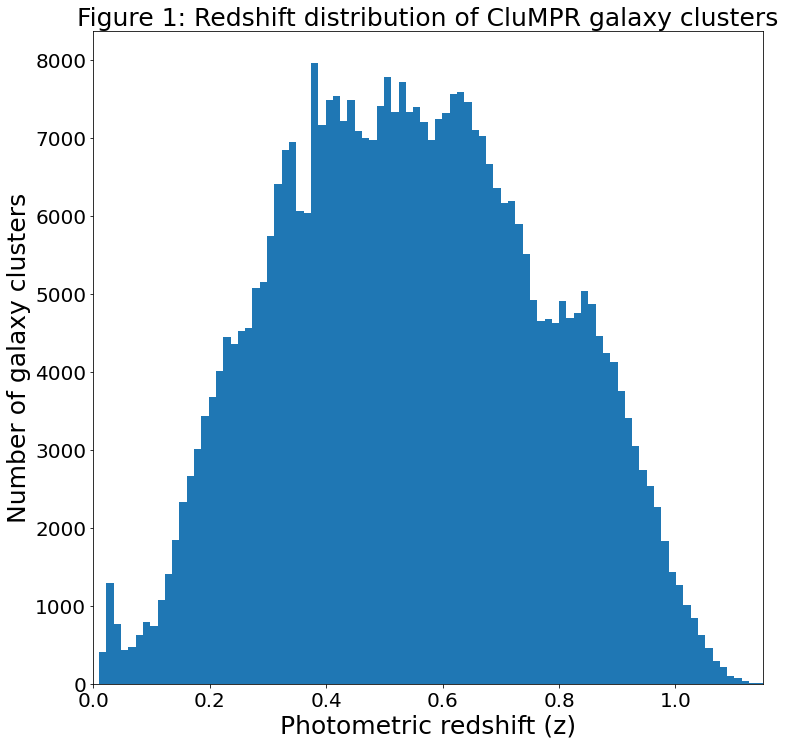

In [161]:
plt.figure(figsize = (12, 12))
plt.hist(clumpr.z_median_central, bins = 100)
plt.xlabel("Photometric redshift (z)", fontsize = 25)
plt.ylabel("Number of galaxy clusters", fontsize = 25)
plt.title("Figure 1: Redshift distribution of CluMPR galaxy clusters", fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(0, 1.15)
plt.show()

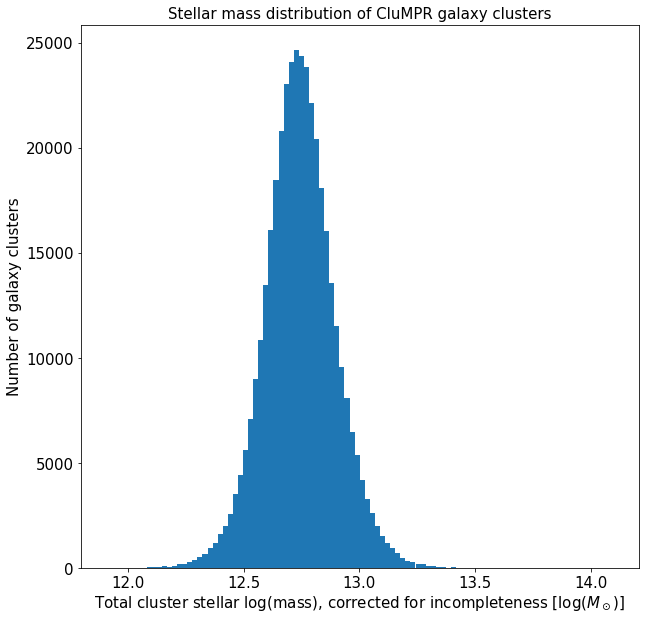

In [20]:
plt.figure(figsize = (10, 10))
plt.hist(clumpr.neighbor_mass, bins = 100)
plt.xlabel("Total cluster stellar log(mass), corrected for incompleteness [log($M_\odot$)]", fontsize = 15)
plt.ylabel("Number of galaxy clusters", fontsize = 15)
plt.title("Stellar mass distribution of CluMPR galaxy clusters", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

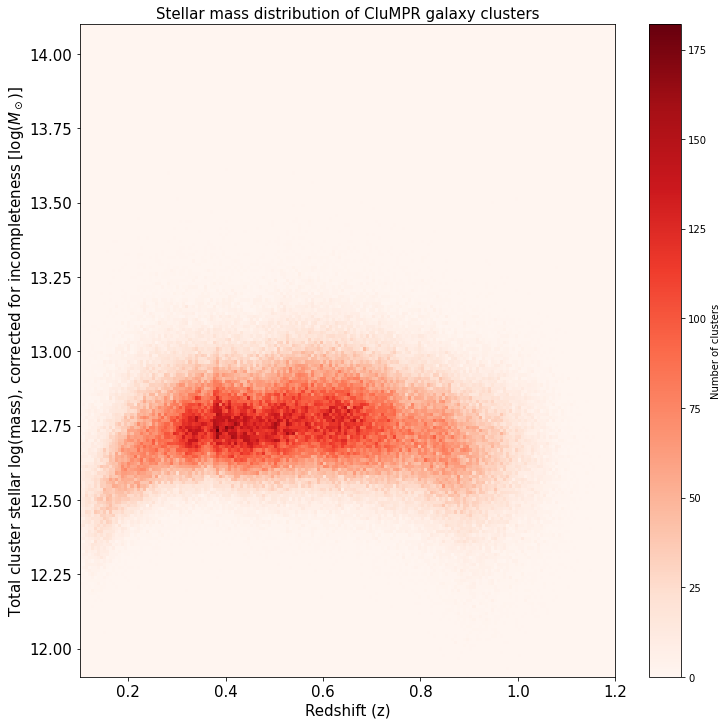

In [160]:
plt.figure(figsize = (12, 12))
plt.hist2d(clumpr.z_median_central, clumpr.neighbor_mass, bins=200, cmap = "Reds")
plt.colorbar(label = "Number of clusters")
plt.ylabel("Total cluster stellar log(mass), corrected for incompleteness [log($M_\odot$)]", fontsize = 15)
plt.xlabel("Redshift (z)", fontsize = 15)
plt.title("Stellar mass distribution of CluMPR galaxy clusters", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(0.1, 1.2)
plt.show()

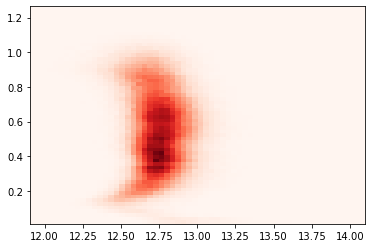

In [146]:
counts,ybins,xbins,image = plt.hist2d(clumpr.neighbor_mass, clumpr.z_median_central,bins=60, cmap = "Reds")

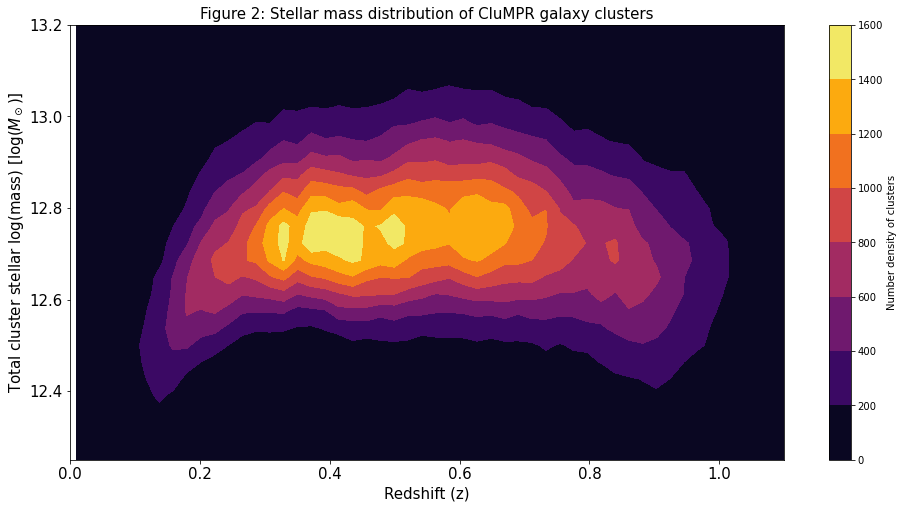

In [74]:
plt.figure(figsize = (16, 8))
plt.ylabel("Total cluster stellar log(mass) [log($M_\odot$)]", fontsize = 15)
plt.xlabel("Redshift (z)", fontsize = 15)
plt.title("Figure 2: Stellar mass distribution of CluMPR galaxy clusters", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.contourf(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],cmap = "inferno", vmin = 1)
plt.colorbar(label = "Number density of clusters")
plt.xlim(0, 1.1)
plt.ylim(12.25, 13.2)
plt.show()

In [62]:
from scipy.stats import kde

In [147]:
data_kde = np.array([clumpr.z_median_central, clumpr.neighbor_mass])

In [148]:
k = kde.gaussian_kde(data_kde)

In [149]:
nbins = 100
xi, yi = np.mgrid[xbins.min():xbins.max():nbins*1j, ybins.min():ybins.max():nbins*1j]

In [150]:
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

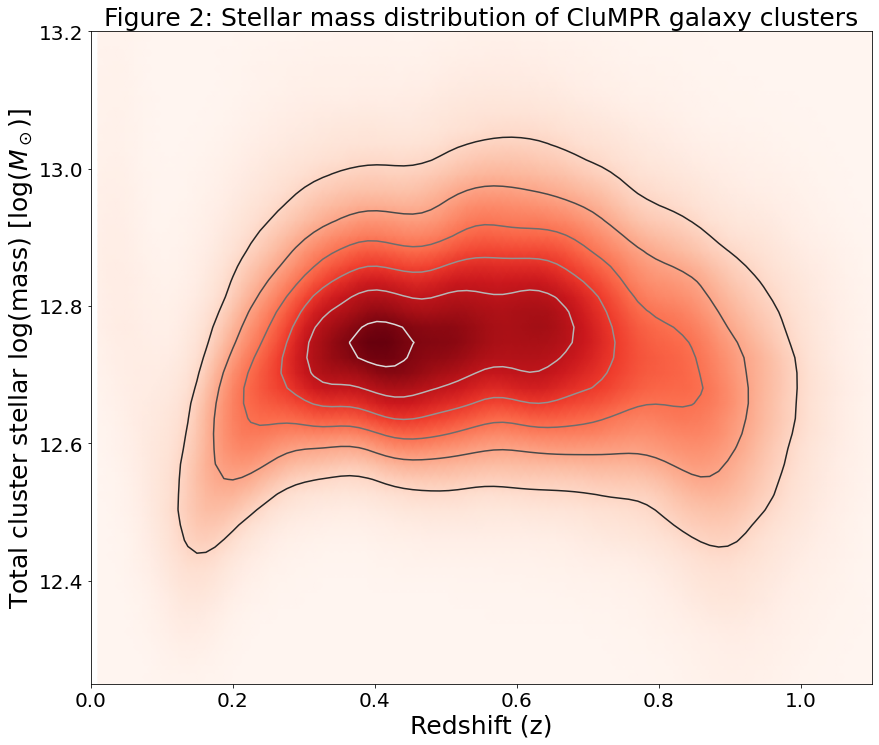

In [160]:
plt.figure(figsize = (14, 12))
plt.ylabel("Total cluster stellar log(mass) [log($M_\odot$)]", fontsize = 25)
plt.xlabel("Redshift (z)", fontsize = 25)
plt.title("Figure 2: Stellar mass distribution of CluMPR galaxy clusters", fontsize = 25)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap="Reds")
#plt.colorbar(label = "Number density of clusters")
plt.contour(xi, yi, zi.reshape(xi.shape), cmap = "gray")
#plt.colorbar(label = "Number density of clusters")
plt.xlim(0, 1.1)
plt.ylim(12.25, 13.2)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

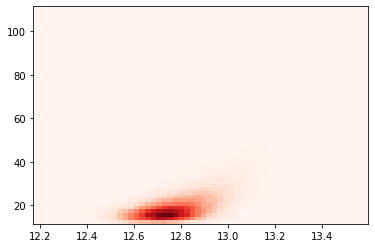

In [63]:
data_kde = np.array([clumpr[np.logical_and(clumpr.z_median_central>0.5, clumpr.z_median_central < 0.6)].corrected_richness, clumpr[np.logical_and(clumpr.z_median_central>0.5, clumpr.z_median_central < 0.6)].neighbor_mass])
k = kde.gaussian_kde(data_kde)
nbins = 100
counts,ybins,xbins,image = plt.hist2d(clumpr[np.logical_and(clumpr.z_median_central>0.5, clumpr.z_median_central < 0.6)].neighbor_mass, clumpr[np.logical_and(clumpr.z_median_central>0.5, clumpr.z_median_central < 0.6)].corrected_richness,bins=60, cmap = "Reds")
xi2, yi2 = np.mgrid[xbins.min():xbins.max():nbins*1j, ybins.min():ybins.max():nbins*1j]

In [64]:
zi2 = k(np.vstack([xi2.flatten(), yi2.flatten()]))

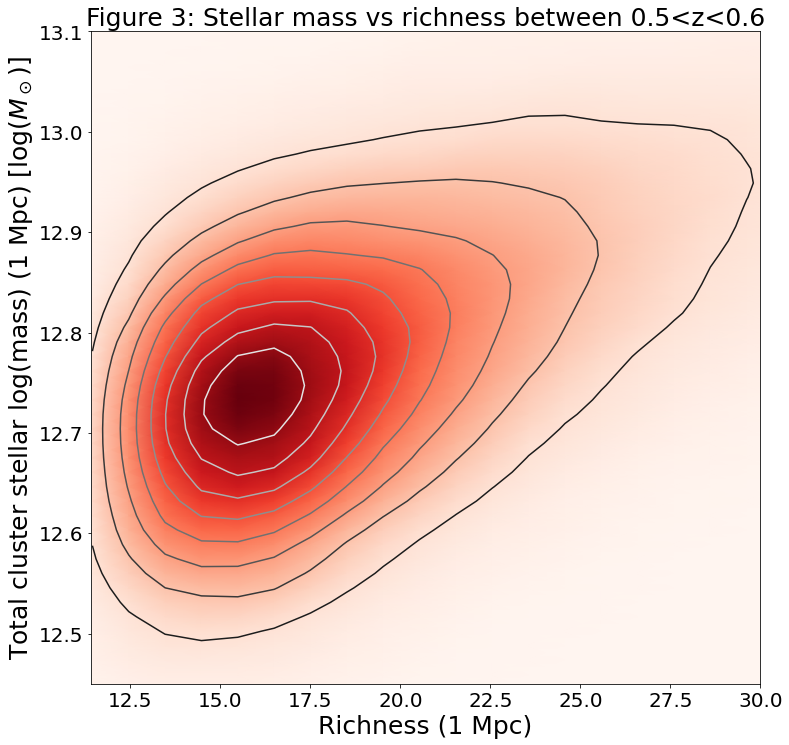

In [74]:
plt.figure(figsize = (12, 12))
plt.ylabel("Total cluster stellar log(mass) (1 Mpc) [log($M_\odot$)]", fontsize = 25)
plt.xlabel("Richness (1 Mpc)", fontsize = 25)
plt.title("Figure 3: Stellar mass vs richness between 0.5<z<0.6", fontsize = 25)
plt.pcolormesh(xi2, yi2, zi2.reshape(xi2.shape), shading='gouraud', cmap="Reds")
#plt.colorbar(label = "Number density of clusters")
plt.contour(xi2, yi2, zi2.reshape(xi2.shape), cmap = "gray", levels = 10)
plt.xlim(11.4, 30)
plt.ylim(12.45, 13.1)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

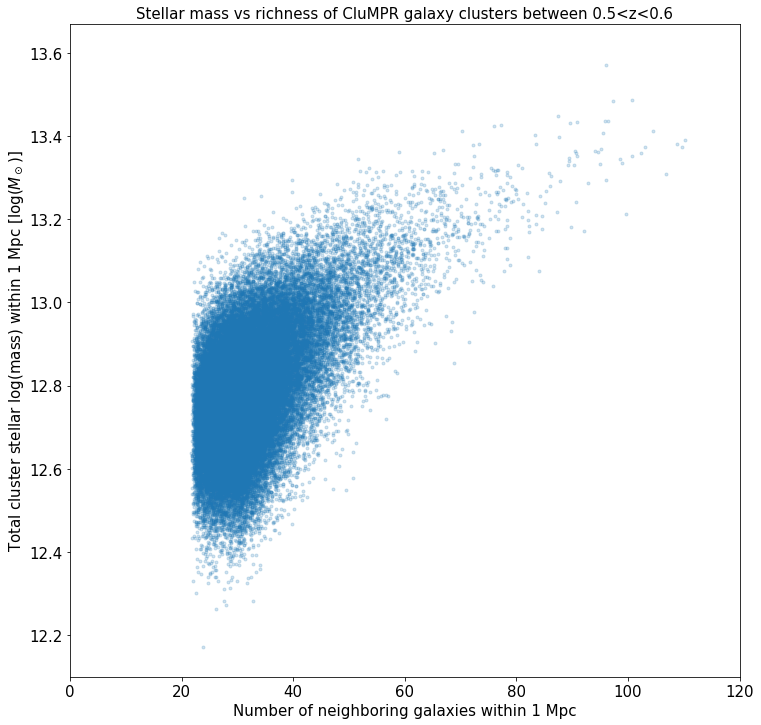

In [56]:
plt.figure(figsize = (12, 12))
plt.plot(clumpr[np.logical_and(clumpr.z_median_central>0.5, clumpr.z_median_central < 0.6)].neighbors, clumpr[np.logical_and(clumpr.z_median_central>0.5, clumpr.z_median_central < 0.6)].neighbor_mass, ".", alpha = 0.2)
plt.ylabel("Total cluster stellar log(mass) within 1 Mpc [log($M_\odot$)]", fontsize = 15)
plt.xlabel("Number of neighboring galaxies within 1 Mpc", fontsize = 15)
plt.title("Stellar mass vs richness of CluMPR galaxy clusters between 0.5<z<0.6", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(0, 120)
plt.show()

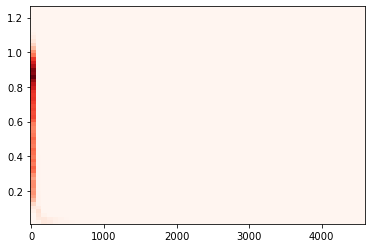

In [76]:
data_kde = np.array([clumpr[sep_constraint].z_median_central, clumpr[sep_constraint].corrected_richness])
k = kde.gaussian_kde(data_kde)
nbins = 100
counts,ybins,xbins,image = plt.hist2d(clumpr[sep_constraint].corrected_richness, clumpr[sep_constraint].z_median_central,bins=60, cmap = "Reds")
xi2, yi2 = np.mgrid[xbins.min():xbins.max():nbins*1j, ybins.min():ybins.max():nbins*1j]
zi3 = k(np.vstack([xi2.flatten(), yi2.flatten()]))

data_kde = np.array([clumpr[~sep_constraint].z_median_central, clumpr[~sep_constraint].corrected_richness])
k = kde.gaussian_kde(data_kde)
nbins = 100
counts,ybins,xbins,image = plt.hist2d(clumpr[~sep_constraint].corrected_richness, clumpr[~sep_constraint].z_median_central,bins=60, cmap = "Reds")
xi2, yi2 = np.mgrid[xbins.min():xbins.max():nbins*1j, ybins.min():ybins.max():nbins*1j]
zi4 = k(np.vstack([xi2.flatten(), yi2.flatten()]))

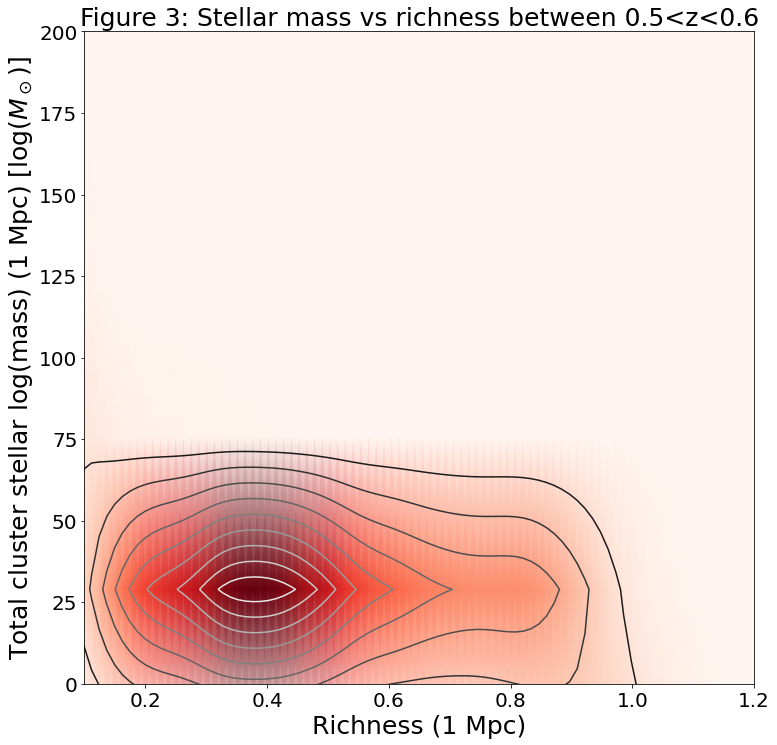

In [78]:
plt.figure(figsize = (12, 12))
plt.ylabel("Total cluster stellar log(mass) (1 Mpc) [log($M_\odot$)]", fontsize = 25)
plt.xlabel("Richness (1 Mpc)", fontsize = 25)
plt.title("Figure 3: Stellar mass vs richness between 0.5<z<0.6", fontsize = 25)
plt.pcolormesh(xi2, yi2, zi4.reshape(xi2.shape), shading='gouraud', cmap="Reds")
#plt.colorbar(label = "Number density of clusters")
plt.contour(xi2, yi2, zi4.reshape(xi2.shape), cmap = "gray", levels = 10)
plt.ylim(0, 200)
plt.xlim(0.1, 1.2)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

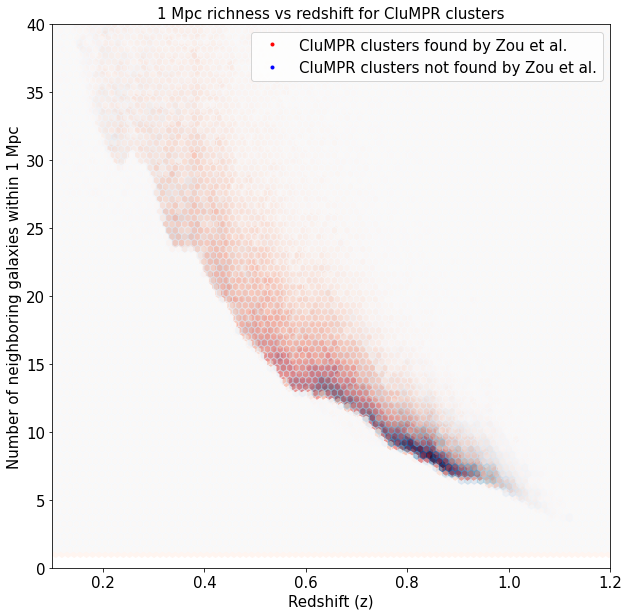

In [213]:
plt.figure(figsize = (10, 10))
plt.hexbin(clumpr[np.logical_and(sep_constraint, clumpr.DEC_central>32)].z_median_central, clumpr[np.logical_and(sep_constraint, clumpr.DEC_central>32)].corrected_richness, gridsize=(100,5000), alpha = 1, cmap = "Reds")
plt.hexbin(clumpr[np.logical_and(~sep_constraint, clumpr.DEC_central>32)].z_median_central, clumpr[np.logical_and(~sep_constraint, clumpr.DEC_central>32)].corrected_richness, gridsize=(100,5000), alpha = 0.5, cmap = "Blues")
plt.plot( np.NaN, np.NaN, ".r", label = "CluMPR clusters found by Zou et al.")
plt.plot( np.NaN, np.NaN, ".b", label = "CluMPR clusters not found by Zou et al.")
plt.xlabel("Redshift (z)", fontsize = 15)
plt.ylabel("Number of neighboring galaxies within 1 Mpc", fontsize = 15)
plt.title("1 Mpc richness vs redshift for CluMPR clusters", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.ylim(0, 40)
plt.xlim(0.1, 1.2)
plt.show()

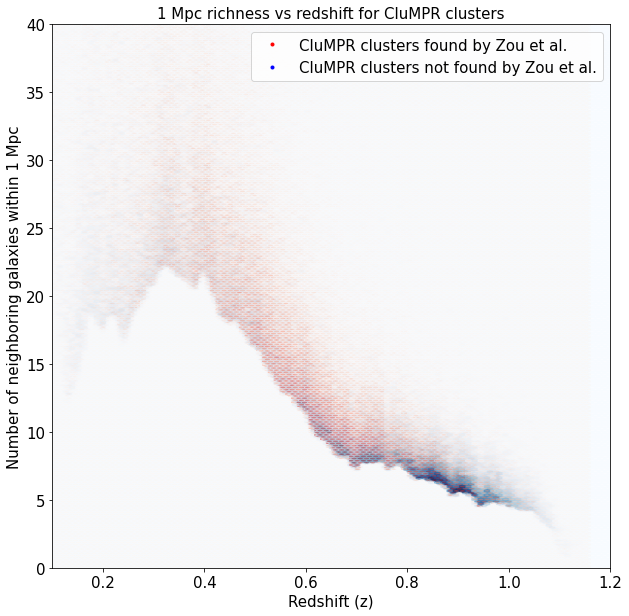

In [214]:
plt.figure(figsize = (10, 10))
plt.hexbin(clumpr[np.logical_and(sep_constraint, clumpr.DEC_central<32)].z_median_central, clumpr[np.logical_and(sep_constraint, clumpr.DEC_central<32)].corrected_richness, gridsize=(100,5000), alpha = 1, cmap = "Reds")
plt.hexbin(clumpr[np.logical_and(~sep_constraint, clumpr.DEC_central<32)].z_median_central, clumpr[np.logical_and(~sep_constraint, clumpr.DEC_central<32)].corrected_richness, gridsize=(100,5000), alpha = 0.5, cmap = "Blues")
plt.plot( np.NaN, np.NaN, ".r", label = "CluMPR clusters found by Zou et al.")
plt.plot( np.NaN, np.NaN, ".b", label = "CluMPR clusters not found by Zou et al.")
plt.xlabel("Redshift (z)", fontsize = 15)
plt.ylabel("Number of neighboring galaxies within 1 Mpc", fontsize = 15)
plt.title("1 Mpc richness vs redshift for CluMPR clusters", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.ylim(0, 40)
plt.xlim(0.1, 1.2)
plt.show()

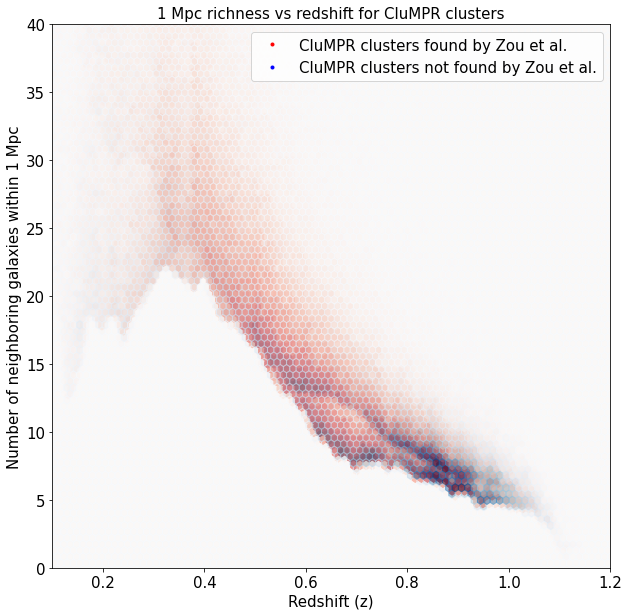

In [212]:
plt.figure(figsize = (10, 10))
plt.hexbin(clumpr[sep_constraint].z_median_central, clumpr[sep_constraint].corrected_richness, gridsize=(100,5000), alpha = 1, cmap = "Reds")
plt.hexbin(clumpr[~sep_constraint].z_median_central, clumpr[~sep_constraint].corrected_richness, gridsize=(100,5000), alpha = 0.5, cmap = "Blues")
plt.plot( np.NaN, np.NaN, ".r", label = "CluMPR clusters found by Zou et al.")
plt.plot( np.NaN, np.NaN, ".b", label = "CluMPR clusters not found by Zou et al.")
plt.xlabel("Redshift (z)", fontsize = 15)
plt.ylabel("Number of neighboring galaxies within 1 Mpc", fontsize = 15)
plt.title("1 Mpc richness vs redshift for CluMPR clusters", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.ylim(0, 40)
plt.xlim(0.1, 1.2)
plt.show()

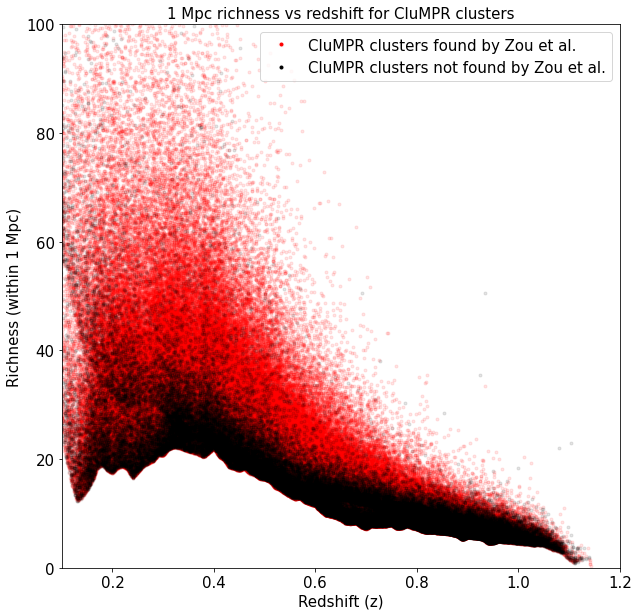

In [176]:
plt.figure(figsize = (10, 10))
plt.plot(clumpr[sep_constraint].z_median_central, clumpr[sep_constraint].corrected_richness, ".r", alpha = 0.1)
plt.plot(clumpr[~sep_constraint].z_median_central, clumpr[~sep_constraint].corrected_richness, ".k", alpha = 0.1)
plt.plot( np.NaN, np.NaN, ".r", label = "CluMPR clusters found by Zou et al.")
plt.plot( np.NaN, np.NaN, ".k", label = "CluMPR clusters not found by Zou et al.")
plt.xlabel("Redshift (z)", fontsize = 15)
plt.ylabel("Richness (within 1 Mpc)", fontsize = 15)
plt.title("1 Mpc richness vs redshift for CluMPR clusters", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.ylim(0, 100)
plt.xlim(0.1, 1.2)
plt.show()

In [184]:
len(clumpr[sep_constraint])/len(clumpr)

0.8246537921420298

In [185]:
found = clumpr[sep_constraint]
len(found[np.logical_and.reduce((found.z_median_central > 0.1, found.corrected_richness > 30))])/len(clumpr[np.logical_and.reduce((clumpr.z_median_central > 0.1, clumpr.corrected_richness > 30))])

0.9226512786055887

In [186]:
found = clumpr[sep_constraint]
len(found[np.logical_and.reduce((found.z_median_central > 0.1, found.corrected_richness > 30, found.z_median_central < 0.5))])/len(clumpr[np.logical_and.reduce((clumpr.z_median_central > 0.1, clumpr.corrected_richness > 30, clumpr.z_median_central < 0.5))])

0.9194728310663189

In [187]:
catalog = SkyCoord(ra=clumpr.RA_central.to_numpy()*u.degree, dec=clumpr.DEC_central.to_numpy()*u.degree)
c = SkyCoord(ra=zou.RA.to_numpy()*u.degree, dec=zou.DEC.to_numpy()*u.degree)

max_sep = 5.0 * u.arcmin
idx, d2d, d3d = c.match_to_catalog_sky(catalog)
sep_constraint = d2d < max_sep
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]

In [188]:
len(zou[~sep_constraint][["RA", "DEC"]])

184438

In [193]:
np.max(zou[~sep_constraint].Richness)

152.942

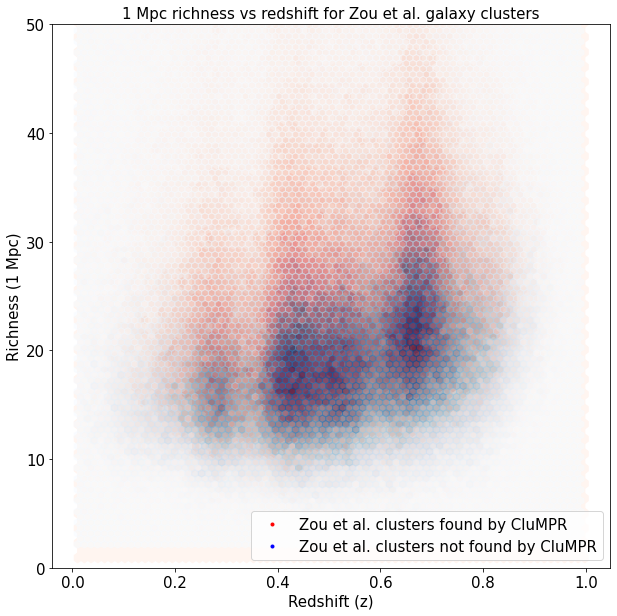

In [209]:
plt.figure(figsize = (10, 10))
plt.hexbin(zou[sep_constraint].zphot, zou[sep_constraint].Richness, gridsize=(75,150), cmap = "Reds", alpha = 1)
plt.hexbin(zou[~sep_constraint].zphot, zou[~sep_constraint].Richness, gridsize=(75,150), cmap = "Blues", alpha = 0.5)
plt.plot( np.NaN, np.NaN, ".r", label = "Zou et al. clusters found by CluMPR")
plt.plot( np.NaN, np.NaN, ".b", label = "Zou et al. clusters not found by CluMPR")
plt.xlabel("Redshift (z)", fontsize = 15)
plt.ylabel("Richness (1 Mpc)", fontsize = 15)
plt.title("1 Mpc richness vs redshift for Zou et al. galaxy clusters", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15, loc = "lower right")
plt.ylim(0, 50)
plt.show()

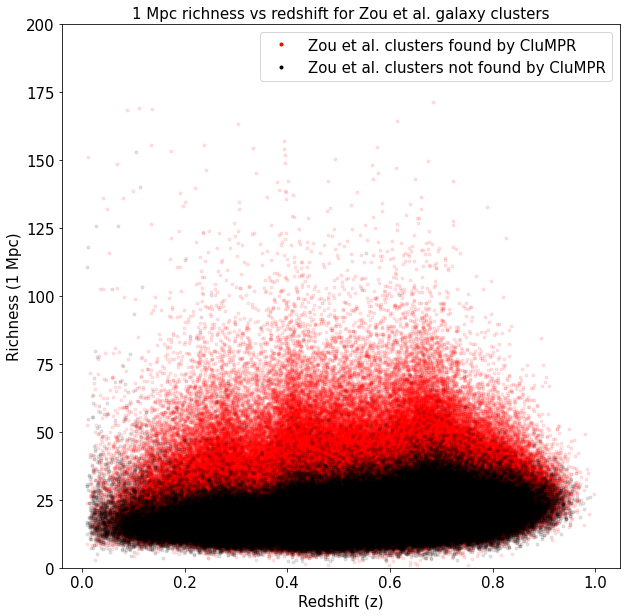

In [197]:
plt.figure(figsize = (10, 10))
plt.plot(zou[sep_constraint].zphot, zou[sep_constraint].Richness, ".r", alpha = 0.1)
plt.plot(zou[~sep_constraint].zphot, zou[~sep_constraint].Richness, ".k", alpha = 0.1)
plt.plot( np.NaN, np.NaN, ".r", label = "Zou et al. clusters found by CluMPR")
plt.plot( np.NaN, np.NaN, ".k", label = "Zou et al. clusters not found by CluMPR")
plt.xlabel("Redshift (z)", fontsize = 15)
plt.ylabel("Richness (1 Mpc)", fontsize = 15)
plt.title("1 Mpc richness vs redshift for Zou et al. galaxy clusters", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.ylim(0, 200)
plt.show()

In [198]:
len(zou[sep_constraint])/len(zou)

0.6587211712111792

In [112]:
found = zou[sep_constraint]
len(found[found.Richness > 30])/len(zou[zou.Richness>30])

0.9072084827405777

In [113]:
found = zou[sep_constraint]
len(found[np.logical_and.reduce((found.Richness > 30, found.zphot < 0.5, found.zphot > 0.1))])/len(zou[np.logical_and.reduce((zou.Richness>30, zou.zphot < 0.5, zou.zphot > 0.1))])

0.9537598743071619

In [34]:
zou[~sep_constraint].sort_values("Richness", ascending = False)[["RA", "DEC", "zphot"]].head(50)

RA        DEC     zphot
370118  189.716323  -4.630585  0.105188
344747  199.648916  -0.743746  0.112463
472636    0.804039 -35.937095  0.027151
49030   221.775893  55.490448  0.070291
159025  195.033869  27.976970  0.012179
78921   197.560860  46.920643  0.553119
165195   13.994237  26.365710  0.200913
370282  198.095256  -4.336540  0.010603
77750   126.360809  47.125170  0.116089
471661   43.791173 -35.432332  0.059556
355368    4.634137  -2.267490  0.544930
466563   62.804331 -32.852722  0.252390
443779   49.816606 -23.931594  0.618135
81606   199.392962  45.469242  0.467695
445313   42.853411 -24.944259  0.102384
335250  167.198162   0.667235  0.231726
75968   193.717412  47.017093  0.349431
468512   70.434272 -33.197589  0.655532
4913    101.417016  76.814501  0.413616
469926   50.333386 -34.239668  0.229247
277532  145.515296   8.975278  0.209780
42710   268.493625  58.085188  0.226307
261892  152.087631  11.756964  0.430882
325846  131.732786   1.662031  0.613018
447868   86.965859 -25.518583  0.026082
147941  231.031001  29.888822  0.093932
91094   271.889711  43.636961  0.664212
483624   88.491113 -40.013760  0.649743
47729   110.154076  55.650189  0.029504
138694  145.457790  31.383506  0.674248
391242  335.548217  -7.540554  0.537401
410301  350.694979 -10.667581  0.459900
27304   106.098848  63.313169  0.080967
184601    5.580750  23.280595  0.129114
467389   15.337591 -33.689690  0.616030
322847  203.144311   2.305744  0.489893
249577  137.046207  13.109138  0.745133
399659    3.165080  -8.935379  0.363070
473727   57.221970 -36.023857  0.504003
36160   248.471092  60.707697  0.639644
114414  273.723486  36.704672  0.658770
51727   251.203965  54.893141  0.744225
524673  312.777570 -52.712501  0.023938
101727  207.411443  39.517819  0.631424
273320  124.170432   9.395734  0.285158
485586   92.064350 -40.756229  0.366652
354881  335.987207  -1.583283  0.074761
357553  177.299654  -2.331678  0.065340
173997  137.260676  25.322157  0.641277
134175  105.096121  32.353680  0.614316

In [30]:
zou[~sep_constraint].sort_values("Richness", ascending = True)[["RA", "DEC", "zphot"]].head(50)

RA        DEC     zphot
171167  208.775711  25.925360  0.411094
134072   31.985929  31.802043  0.429391
58281   207.889209  52.792093  0.484078
45079   278.728810  57.750902  0.401780
215963  340.135274  19.080379  0.487457
424371   29.002037 -15.758533  0.679176
405403  332.503443  -9.079431  0.667609
535040  325.259855 -56.576588  0.428125
125846  352.163824  34.141800  0.465746
309473  131.955114   4.577309  0.455702
381423  160.524397  -6.087106  0.614906
95938   214.029507  41.890514  0.665131
87474   219.291024  43.976377  0.565069
217794  162.206231  18.451930  0.363515
302206  185.768342   5.590060  0.614668
184700   10.819961  23.426837  0.615506
259936  321.025732  12.132291  0.489428
112504  149.628635  37.725489  0.443400
522482  305.970150 -51.907430  0.649836
440779   63.450126 -22.924015  0.794999
160357  330.501233  27.766188  0.584601
354734  328.091215  -1.902579  0.510600
458515    6.630793 -30.299804  0.094659
387688  358.912047  -6.565468  0.525751
322335  173.325225   2.547522  0.518382
102118  231.640485  39.883957  0.649199
338847   71.476603  -0.012469  0.314864
499777   13.214176 -44.332540  0.498712
383998   25.552050  -6.212974  0.549728
82356   256.800540  45.567781  0.295767
399931   20.472421  -9.018025  0.454218
245496  132.539726  13.972587  0.463046
267938  328.386678  10.341096  0.595396
1846    163.100334  80.138353  0.342258
538484   85.385044 -58.371611  0.337834
234850  216.191319  15.509198  0.426975
337220  338.703931   0.847635  0.447527
6094    185.509147  76.158838  0.284616
29920   202.312194  62.615607  0.248047
370542  213.748923  -4.747310  0.489895
75489   161.994776  46.972536  0.458277
485640   93.560141 -40.859370  0.459209
386136  195.913606  -6.630768  0.375440
204835   30.772390  19.899464  0.423584
80783   142.262549  45.564835  0.632025
404129   63.861656  -9.279007  0.447901
409869  325.745478 -11.141668  0.544031
157068   15.623694  28.037764  0.663035
383997   25.407867  -6.226074  0.470517
263981  331.605097  11.430287  0.682077

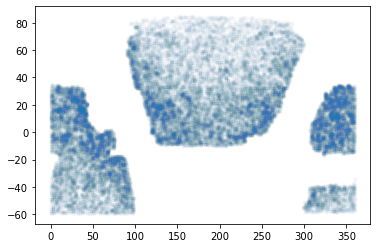

In [31]:
plt.plot(zou[~sep_constraint].RA, zou[~sep_constraint].DEC, ".", alpha = 0.01)

In [ ]:
plt.plot(clumpr.RA_central, clumpr.DEC_central)

In [ ]:
193.7, 47

In [ ]:
hdul = fits.open("/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-190p045-200p050.fits")

In [88]:
import fitsio
fits_data = fitsio.FITS("/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/sweep-190p045-200p050.fits")
sweep = fits_data[1].read(columns=['RELEASE','BRICKID','BRICKNAME', 'OBJID', 'TYPE', 'RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_W1', 'MASKBITS', 'GAIA_PHOT_G_MEAN_MAG', 'GAIA_ASTROMETRIC_EXCESS_NOISE'])

In [105]:
sweep

array([(9011, 583471, '1994p497',   34, 'REX', 199.27208112, 49.8074455 , 0.18873681,  0.6351091 ,  0.85255975,  2.5468915, 0., 0., 0),
       (9011, 583471, '1994p497',   35, 'EXP', 199.2722735 , 49.80026591, 0.55903715,  2.8147078 ,  7.4360256 , 17.134706 , 0., 0., 0),
       (9011, 583471, '1994p497',   36, 'REX', 199.27235461, 49.7306684 , 0.25930512,  0.5399482 ,  0.8335913 ,  2.6974485, 0., 0., 0),
       ...,
       (9011, 565907, '1985p452', 3857, 'PSF', 198.74226057, 45.34500897, 0.05587608,  0.59962386,  1.345984  ,  1.0524058, 0., 0., 0),
       (9011, 565907, '1985p452', 3858, 'REX', 198.74247736, 45.21030181, 0.03256461,  0.82495177,  1.8777397 , -5.600092 , 0., 0., 0),
       (9011, 565907, '1985p452', 3859, 'REX', 198.74262089, 45.19329826, 7.624269  , 10.189125  , 11.057433  ,  8.837795 , 0., 0., 1)],
      dtype=[('RELEASE', '>i2'), ('BRICKID', '>i4'), ('BRICKNAME', '<U8'), ('OBJID', '>i4'), ('TYPE', '<U3'), ('RA', '>f8'), ('DEC', '>f8'), ('FLUX_G', '>f4'), ('FLUX_R', 

In [107]:
search = pd.DataFrame(columns = ["RA", "DEC"])
search.RA = sweep["RA"]
search.DEC = sweep["DEC"]

In [109]:
search

RA        DEC
0        199.272081  49.807445
1        199.272274  49.800266
2        199.272355  49.730668
3        199.272472  49.796136
4        199.272522  49.844318
...             ...        ...
2015168  198.742207  45.198178
2015169  198.742247  45.168756
2015170  198.742261  45.345009
2015171  198.742477  45.210302
2015172  198.742621  45.193298

[2015173 rows x 2 columns]

In [114]:
searched = search.sample(100000)

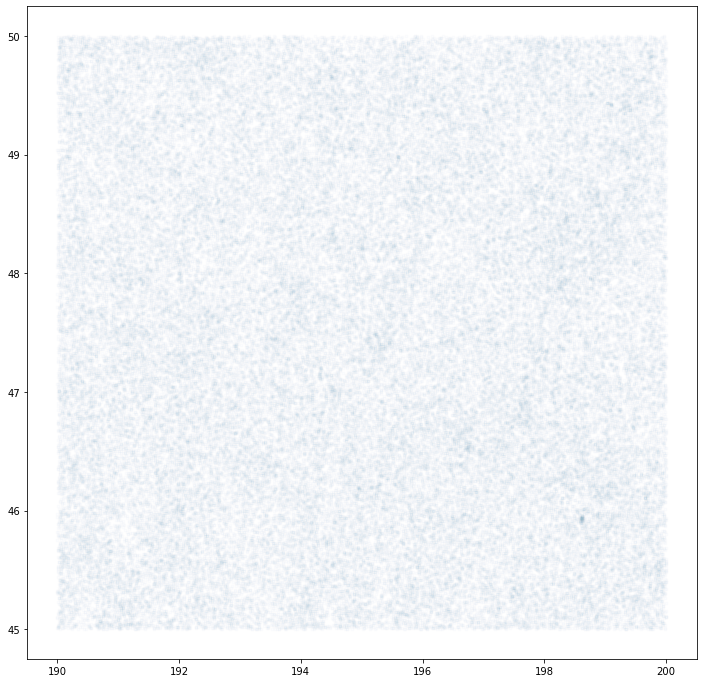

In [118]:
plt.figure(figsize = (12, 12))
plt.plot(searched["RA"], searched["DEC"], ".", alpha = 0.01)
plt.show()

In [139]:
searcher = Table.read("/global/project/projectdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0-photo-z/sweep-190p045-200p050-pz.fits").to_pandas()

In [140]:
searcher

RELEASE  BRICKID  OBJID  Z_PHOT_MEAN  Z_PHOT_MEDIAN  Z_PHOT_STD  \
0           9011   583471     34     0.703448       0.698179    0.215097   
1           9011   583471     35     0.502554       0.498718    0.052194   
2           9011   583471     36     0.826495       0.823218    0.213577   
3           9011   583471     37     0.916051       0.910664    0.217737   
4           9011   583471     38     0.945401       0.932210    0.146746   
...          ...      ...    ...          ...            ...         ...   
2015168     9011   565907   3855     0.819128       0.825455    0.238462   
2015169     9011   565907   3856     0.991516       0.993106    0.173489   
2015170     9011   565907   3857     0.502805       0.499415    0.139299   
2015171     9011   565907   3858     0.461795       0.424916    0.191717   
2015172     9011   565907   3859     0.118514       0.096893    0.101268   

         Z_PHOT_L68  Z_PHOT_U68  Z_PHOT_L95  Z_PHOT_U95  Z_SPEC SURVEY  \
0          0.497836    0.917572    0.349286    1.172197   -99.0   b' '   
1          0.473061    0.529705    0.446562    0.560282   -99.0   b' '   
2          0.607660    1.040296    0.391864    1.231514   -99.0   b' '   
3          0.712105    1.140907    0.477297    1.296999   -99.0   b' '   
4          0.817568    1.079466    0.720900    1.260670   -99.0   b' '   
...             ...         ...         ...         ...     ...    ...   
2015168    0.587973    1.024859    0.318064    1.294003   -99.0   b' '   
2015169    0.830346    1.172411    0.644172    1.286689   -99.0   b' '   
2015170    0.406294    0.608659    0.125226    0.778177   -99.0   b' '   
2015171    0.360327    0.571254    0.073903    0.959816   -99.0   b' '   
2015172    0.026010    0.181141    0.014191    0.379654   -99.0   b' '   

         TRAINING  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
2015168     False  
2015169     False  
2015170     False  
2015171     False  
2015172     False  

[2015173 rows x 13 columns]

In [147]:
searcher["RA"] = searched["RA"]
searcher["DEC"] = searched["DEC"]
searcher["mass"] = np.load("/global/cfs/cdirs/desi/users/rongpu/ls_dr9.0_photoz/stellar_mass/north/sweep-190p045-200p050_stellar_mass.npy")

In [151]:
searcher1 = searcher[searcher.Z_PHOT_MEAN > 0]
searcher2 = searcher[searcher.Z_PHOT_MEAN < 0]
searcher3 = searcher[searcher.mass > 11.2]

In [152]:
len(searcher)

2015173

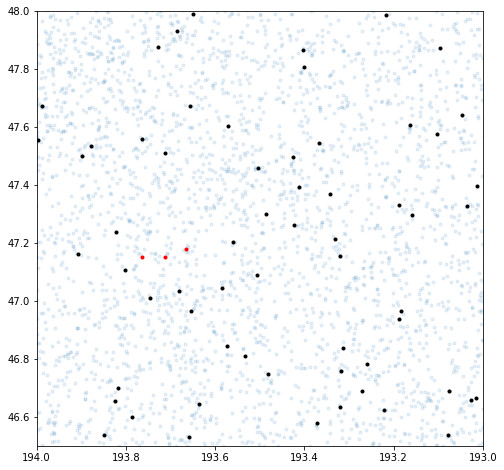

In [153]:
plt.figure(figsize = (8, 8))
plt.plot(searcher1["RA"], searcher1["DEC"], ".", alpha = 0.1)
plt.plot(searcher2["RA"], searcher2["DEC"], ".r", alpha = 1)
plt.plot(searcher3["RA"], searcher3["DEC"], ".k", alpha = 1)
plt.xlim(194, 193)
plt.ylim(46.5, 48)
plt.show()

<ipython-input-52-7d11bbfdf991>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, (np.pi/np.sqrt(6))*(651.834 - np.log(x)))


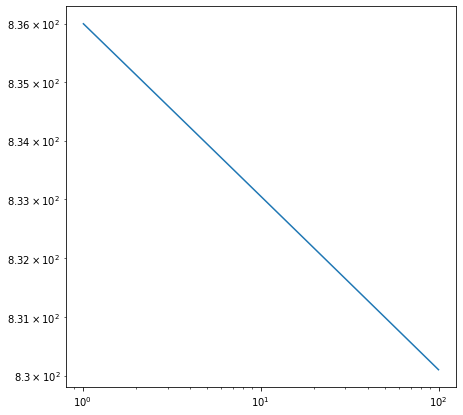

In [52]:
plt.figure(figsize = (7, 7))
x = np.linspace(0, 100, 100)
plt.plot(x, (np.pi/np.sqrt(6))*(651.834 - np.log(x)))
plt.yscale("log")
plt.xscale("log")
plt.show()

In [54]:
511*np.e**(3*np.pi/(2/137))

1.223944188709835e+283

<ipython-input-55-eb459600c0e0>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, (np.pi*np.sqrt(8*3/23))*(np.log(x) - 2.294))


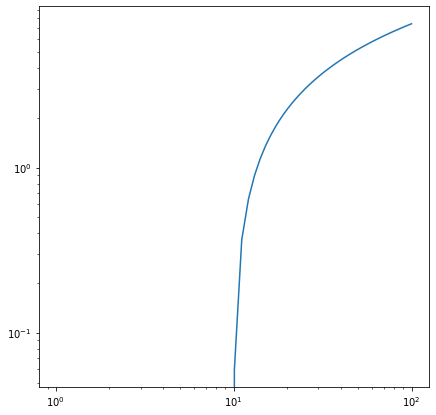

In [55]:
plt.figure(figsize = (7, 7))
x = np.linspace(0, 100, 100)
plt.plot(x, (np.pi*np.sqrt(8*3/23))*(np.log(x) - 2.294))
plt.yscale("log")
plt.xscale("log")
plt.show()